<a href="https://colab.research.google.com/github/v7oliveira/v7oliveira/blob/main/Pandas2_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes 


In [1]:
## importanto Pandas

import pandas as pd

In [2]:
# Lendo arquivos em json

nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=M")



In [3]:
# Puxando uma amostra do arquivo com nomes femininos

nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
11,CAMILA,0,469851,12,F
6,MARCIA,0,551855,7,F
14,JESSICA,0,456472,15,F
19,MARIANA,0,381778,20,F
8,PATRICIA,0,529446,9,F


In [4]:
# Puxando uma amostra do arquivo com nomes Masculinos (random)

nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
13,DANIEL,0,706527,14,M
9,MARCOS,0,1101126,10,M
18,RAIMUNDO,0,611174,19,M
16,EDUARDO,0,628539,17,M
2,ANTONIO,0,2567494,3,M


In [5]:
# Somando a quantidade de nomes 
## lembrar de utilizar "str" para não apresentar erro
 
print('Quantidade de nomes:' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes:40


In [6]:
# Juntando as listas
frames = [nomes_f, nomes_m]


In [7]:
# Juntando apenas o campo nome e exportando para um novo dataframe

nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
0,JOSE
19,MARIANA
9,ALINE
14,JESSICA
5,JULIANA


# Incluindo ID dos alunos

In [8]:
import numpy as np
np.random.seed(123)

In [9]:
total_alunos = len(nomes)
total_alunos

40

In [10]:
# Gerando ID's de forma randomica

nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [11]:
nomes.sample(10)

,nome,id_aluno
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26
11,GABRIEL,37
8,LUIZ,10
9,MARCOS,16
9,ALINE,21
17,FELIPE,35
12,RAFAEL,33
1,ANA,11


In [12]:
## Criando dominios de e-mail

dominios = ['@dominioemail.com.br', '@servicodoemail.com.br']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [13]:
nomes.sample(10)

,nome,id_aluno,dominio
14,MARCELO,23,@dominioemail.com.br
2,FRANCISCA,13,@servicodoemail.com.br
12,RAFAEL,33,@servicodoemail.com.br
9,ALINE,21,@servicodoemail.com.br
11,CAMILA,38,@dominioemail.com.br
3,FRANCISCO,36,@servicodoemail.com.br
17,FELIPE,35,@dominioemail.com.br
6,PEDRO,15,@dominioemail.com.br
14,JESSICA,19,@servicodoemail.com.br
19,RODRIGO,3,@servicodoemail.com.br


In [14]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio). str.lower()

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email
4,ADRIANA,6,@dominioemail.com.br,adriana@dominioemail.com.br
0,MARIA,7,@dominioemail.com.br,maria@dominioemail.com.br
13,DANIEL,34,@dominioemail.com.br,daniel@dominioemail.com.br
15,LETICIA,40,@servicodoemail.com.br,leticia@servicodoemail.com.br
11,CAMILA,38,@dominioemail.com.br,camila@dominioemail.com.br


# Criando a tabela cursos

In [16]:
!pip3 install html5lib
!pip3 install lxml


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import html5lib

In [18]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos


[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [19]:
type(cursos)

list

In [20]:
## modificando para DataFrame
cursos = cursos[0]

In [21]:
type(cursos)

pandas.core.frame.DataFrame

In [22]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


## modificando nomes de colunas

In [23]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos.head(2)


,nome_do_curso
0,Lógica de programação
1,Java para Web


In [24]:
cursos['id'] = cursos.index + 1

In [25]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [26]:
cursos = cursos.set_index('id')


In [27]:
cursos.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [28]:
nomes.sample(5)

,nome,id_aluno,dominio,email
7,FERNANDA,2,@dominioemail.com.br,fernanda@dominioemail.com.br
12,RAFAEL,33,@servicodoemail.com.br,rafael@servicodoemail.com.br
11,GABRIEL,37,@servicodoemail.com.br,gabriel@servicodoemail.com.br
17,LUCIANA,32,@servicodoemail.com.br,luciana@servicodoemail.com.br
13,BRUNA,8,@servicodoemail.com.br,bruna@servicodoemail.com.br


## Matriculnando os alunos nos cursos

In [29]:
#utilizando o numpy para criar em quantos cursos o aluno está matriculado

nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [30]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
6,PEDRO,15,@dominioemail.com.br,pedro@dominioemail.com.br,1
16,JULIA,4,@servicodoemail.com.br,julia@servicodoemail.com.br,1
8,PATRICIA,14,@dominioemail.com.br,patricia@dominioemail.com.br,1
2,FRANCISCA,13,@servicodoemail.com.br,francisca@servicodoemail.com.br,2
4,ADRIANA,6,@dominioemail.com.br,adriana@dominioemail.com.br,1


In [31]:
# descrição matemática dos cursos

nomes.matriculas.describe()

count    40.000000
mean      1.700000
std       0.966092
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: matriculas, dtype: float64

In [32]:
# verificar a distribuição de alunos num gráfico

import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


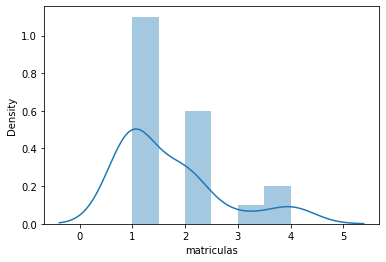

In [33]:
sns.distplot(nomes.matriculas)

In [34]:
## Verificando o numero de matriculas para cada aluno

nomes.matriculas.value_counts()

1    22
2    12
4     4
3     2
Name: matriculas, dtype: int64

In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
11,CAMILA,38,@dominioemail.com.br,camila@dominioemail.com.br,1
6,PEDRO,15,@dominioemail.com.br,pedro@dominioemail.com.br,1
10,SANDRA,9,@servicodoemail.com.br,sandra@servicodoemail.com.br,2
11,GABRIEL,37,@servicodoemail.com.br,gabriel@servicodoemail.com.br,3
3,FRANCISCO,36,@servicodoemail.com.br,francisco@servicodoemail.com.br,2


# Selecionando cursos

In [36]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [37]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [38]:
matriculas.head()

,id_aluno,id_curso
0,7,16
1,11,8
2,13,16
3,13,20
4,39,5


In [40]:
# organizando e renomeando colunas do dataframe

matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos' })

In [41]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
7,LUCAS,1,@servicodoemail.com.br,lucas@servicodoemail.com.br,2
0,MARIA,7,@dominioemail.com.br,maria@dominioemail.com.br,1
12,RAFAEL,33,@servicodoemail.com.br,rafael@servicodoemail.com.br,2
19,RODRIGO,3,@servicodoemail.com.br,rodrigo@servicodoemail.com.br,3
18,VANESSA,22,@servicodoemail.com.br,vanessa@servicodoemail.com.br,1


In [42]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [44]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,4,Novas integrações com Java
9,6,TDD com Java


# Saída em diferentes formatos

In [45]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,2,Java para Web
3,3,C# para Web


In [46]:
# Exportando para .csv

matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [47]:
# lendo o arquivo .csv

pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,3,Lógica de programação
1,2,Java para Web
2,3,C# para Web
3,1,Ruby on Rails
4,1,Cursos de Python
5,4,PHP com MySql
6,7,.NET para web
7,4,Novas integrações com Java
8,6,TDD com Java
9,7,Código limpo com C#


In [48]:
## Exportando em json

matriculas_json = matriculas_por_curso.to_json()

In [49]:
matriculas_json

'{"quantidade_de_alunos":{"1":3,"2":2,"3":3,"4":1,"5":1,"6":4,"7":7,"8":4,"9":6,"10":7,"13":5,"14":1,"15":4,"16":3,"17":5,"18":5,"19":2,"20":5},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [50]:
# exportando em html

matriculas_html = matriculas_por_curso.to_html()

In [51]:
# utilizar o visual studio e salvar como tipo html para poder visualizar

matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>3</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>3</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>1</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>1</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>4</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>7</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>4</td>\n      <td>Novas integrações com Java</td>\n    </tr

# Criando banco em SQL

In [52]:
!pip install sqlalchemy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco SQL

In [54]:
query = 'select * from matriculas where quantidade_de_alunos < 5'

In [55]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,3,Lógica de programação
1,2,2,Java para Web
2,3,3,C# para Web
3,4,1,Ruby on Rails
4,5,1,Cursos de Python
5,6,4,PHP com MySql
6,8,4,Novas integrações com Java
7,14,1,Desenvolvendo jogos
8,15,4,Análise de dados
9,16,3,Estatística básica


In [57]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,3
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,4
8,TDD com Java,6
9,Código limpo com C#,7


In [59]:
# 

muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,3
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,4
8,TDD com Java,6
9,Código limpo com C#,7


In [60]:
muitas_matriculas.query('quantidade_de_alunos > 3')

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,4
8,TDD com Java,6
9,Código limpo com C#,7
10,Persistência com .NET,5
12,Análise de dados,4
14,Internet das coisas,5
15,Programação funcional,5
17,Orientação objetos com Java,5


# Escrevendo no banco

In [61]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [62]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos da próxima turma

In [64]:
## Localizando todos os alunos que irão fazer o curso de "ID 7"

id_curso = 7
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
8,24,7
19,25,7
35,36,7
37,30,7
49,31,7
51,31,7
65,3,7


In [67]:
# mostrar os nomes dos alunos que irão fazer o curso de Id 7

proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
3,7,RODRIGO,@servicodoemail.com.br,rodrigo@servicodoemail.com.br,3
24,7,MARCIA,@servicodoemail.com.br,marcia@servicodoemail.com.br,1
25,7,AMANDA,@servicodoemail.com.br,amanda@servicodoemail.com.br,1
30,7,CARLOS,@dominioemail.com.br,carlos@dominioemail.com.br,1
31,7,LUIS,@dominioemail.com.br,luis@dominioemail.com.br,4
31,7,LUIS,@dominioemail.com.br,luis@dominioemail.com.br,4
36,7,FRANCISCO,@servicodoemail.com.br,francisco@servicodoemail.com.br,2


In [68]:
# Filtrando apenas pelo nome do aluno que irá fazer o curso

proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
3       RODRIGO
24       MARCIA
25       AMANDA
30       CARLOS
31         LUIS
31         LUIS
36    FRANCISCO
Name: nome, dtype: object

In [69]:
# transformando em Dataframe

proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
3,RODRIGO
24,MARCIA
25,AMANDA
30,CARLOS
31,LUIS
31,LUIS
36,FRANCISCO


In [70]:
# buscar nomes do curso

nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    .NET para web
Name: 7, dtype: object

In [71]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'.NET para web'

In [72]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [76]:
# modificando o campo de 'Nome' para 'Alunos do curso {}'

proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})
proxima_turma

,Alunos do curso de .NET para web
id_aluno,
3,RODRIGO
24,MARCIA
25,AMANDA
30,CARLOS
31,LUIS
31,LUIS
36,FRANCISCO


# Exportando para Excel

In [77]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [78]:
# Lendo arquivo Excel

pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de .NET para web
0,RODRIGO
1,MARCIA
2,AMANDA
3,CARLOS
4,LUIS
5,LUIS
6,FRANCISCO
